In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
import joblib
import seaborn as sns

In [2]:
df = pd.read_csv('final_df.csv')

#### Preprocessing

In [3]:
X = df['Review']
y = df['Dominant_topic']

In [4]:
# split data into test and training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state = 77)

#initiate vectorizer and fit
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df = 0.5)
vectorizer.fit(X_train)

#save
#joblib.dump(vectorizer, './models/tfidf_vectorizer.pkl')


TfidfVectorizer(max_df=0.5, sublinear_tf=True)

In [5]:
#transform to vectors
X_train_v = vectorizer.transform(X_train).toarray()
X_test_v = vectorizer.transform(X_test).toarray()

#### Model Training - RF

In [130]:
#
clf = RandomForestClassifier(
    n_estimators = 75,
    criterion = 'entropy',
    random_state = 77,
    class_weight = 'balanced',
    min_samples_split = 20,
    max_samples = 0.5
)

clf.fit(X_train_v, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_samples=0.5, min_samples_split=20, n_estimators=75,
                       random_state=77)

In [126]:
y_pred = clf.predict(X_test_v)
y_pred_train = clf.predict(X_train_v)

print(
    accuracy_score(y_train, y_pred_train),
    accuracy_score(y_test, y_pred)
)

0.9690358902181563 0.8273921200750469


In [127]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

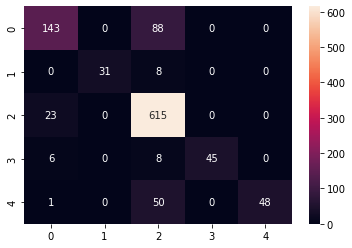

In [128]:
sns.heatmap(cm, annot=True, fmt='d')

In [129]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.62      0.71       231
           1       1.00      0.79      0.89        39
           2       0.80      0.96      0.87       638
           3       1.00      0.76      0.87        59
           4       1.00      0.48      0.65        99

    accuracy                           0.83      1066
   macro avg       0.93      0.73      0.80      1066
weighted avg       0.84      0.83      0.82      1066



#### Model Training - AdaBoost

In [136]:
clf_ada = AdaBoostClassifier(
    n_estimators = 75,
    random_state = 77,
    learning_rate = 0.8
)

clf_ada.fit(X_train_v, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=75, random_state=77)

In [137]:
y_pred = clf_ada.predict(X_test_v)
y_pred_train = clf_ada.predict(X_train_v)

print(
    accuracy_score(y_train, y_pred_train),
    accuracy_score(y_test, y_pred)
)

0.6183438892798498 0.600375234521576


#### SVM

In [6]:
svc = SVC(
    class_weight = 'balanced'
)
svc.fit(X_train_v, y_train)

SVC(class_weight='balanced')

In [7]:
y_pred = svc.predict(X_test_v)
y_pred_train = svc.predict(X_train_v)

print(
    accuracy_score(y_train, y_pred_train),
    accuracy_score(y_test, y_pred)
)

0.9861599812338728 0.8724202626641651


<AxesSubplot:>

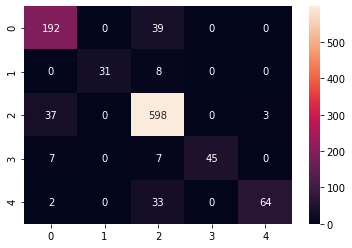

In [8]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

#### Pipeline

In [10]:
import pickle 
pipe = make_pipeline(vectorizer, svc)

with open('pipe_model', 'wb') as files:
    pickle.dump(pipe, files)

model = pickle.load(open('pipe_model','rb'))

pipe.fit(X_train, y_train)
#joblib.dump(pipe, './models/pipeline.pkl')

pipeline_pred = pipe.predict(X_test)
print(f'pipeline test > accuracy against test set is {accuracy_score(y_test, pipeline_pred)}')


pipeline test > accuracy against test set is 0.8724202626641651


In [11]:
model

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.5, sublinear_tf=True)),
                ('svc', SVC(class_weight='balanced'))])

In [16]:
df['Topic'] = model.predict(df['Review'])

In [18]:
from sklearn.svm import LinearSVC

In [ ]:
make_pipeline(LinearSVC(random_state=0, tol=1e-5))

In [19]:
svc = LinearSVC(
    class_weight = 'balanced'
, random_state = 100)
svc.fit(X_train_v, y_train)

LinearSVC(class_weight='balanced', random_state=100)

In [20]:
y_pred = svc.predict(X_test_v)
y_pred_train = svc.predict(X_train_v)

print(
    accuracy_score(y_train, y_pred_train),
    accuracy_score(y_test, y_pred)
)

0.9978888106966924 0.8939962476547842


<AxesSubplot:>

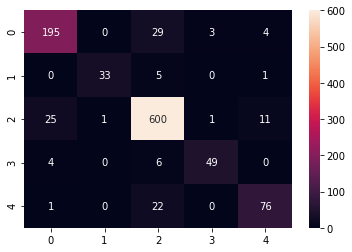

In [21]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       231
           1       0.97      0.85      0.90        39
           2       0.91      0.94      0.92       638
           3       0.92      0.83      0.88        59
           4       0.83      0.77      0.80        99

    accuracy                           0.89      1066
   macro avg       0.90      0.85      0.87      1066
weighted avg       0.89      0.89      0.89      1066



In [27]:
import pickle 
pipe = make_pipeline(vectorizer, svc)

with open('lsvc_pipe_model', 'wb') as files:
    pickle.dump(pipe, files)

model = pickle.load(open('lsvc_pipe_model','rb'))


In [28]:
model.predict(df['Review'])

array([4, 2, 0, ..., 2, 0, 4], dtype=int64)

In [29]:
model

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.5, sublinear_tf=True)),
                ('linearsvc',
                 LinearSVC(class_weight='balanced', random_state=100))])